<a href="https://colab.research.google.com/github/bhargav23/AIML-DL-Lab/blob/main/3_Neural_Network_for_Reuters_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3. Design a neural Network for classifying news wires (Multi class classification) using Reuters dataset.**

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# --- 1. Data Loading and Preprocessing ---

print("Loading Reuters dataset...")
# Load the dataset, keeping only the top 10,000 most frequently occurring words.
# The data is already pre-processed and split into training and testing sets.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f"Number of training samples: {len(train_data)}")
print(f"Number of testing samples: {len(test_data)}")
print(f"Number of categories: {len(np.unique(train_labels))}")

# The data in `train_data` and `test_data` consists of lists of integers,
# where each integer represents a specific word. Let's see an example.
print("--- Sample training data (integer sequence) ---")
print(train_data[0])

# To understand what these integers mean, we can load the word index.
word_index = reuters.get_word_index()
# We create a reverse index to map integers back to words.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note: The indices are offset by 3 because 0, 1, and 2 are reserved indices
# for "padding," "start of sequence," and "unknown."
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("\n--- Decoded sample newswire ---")
print(decoded_newswire)


def vectorize_sequences(sequences, dimension=10000):
    """
    Converts integer sequences into a binary matrix (one-hot encoding).
    This is a common way to prepare text data for a neural network.
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

print("\nVectorizing data...")
# Vectorize the training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# The labels are integers representing the category. We need to convert them
# to a categorical format (one-hot encoding).
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Loading Reuters dataset...
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 8982
Number of testing samples: 2246
Number of categories: 46
--- Sample training data (integer sequence) ---
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Decoded sample newswire ---
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this 

In [3]:
# --- 2. Model Definition ---

print("Building the neural network model...")
# We will use a simple stack of fully connected (Dense) layers.
model = Sequential()
# Input layer: 512 units, 'relu' activation. The input shape is 10000,
# which is the size of our vocabulary.
model.add(Dense(512, activation='relu', input_shape=(10000,)))
# Hidden layer: Also 512 units with 'relu' activation.
model.add(Dense(512, activation='relu'))
# Output layer: 46 units, corresponding to the 46 different news categories.
# 'softmax' activation is used because it outputs a probability distribution
# over the 46 categories, making it ideal for multi-class classification.
model.add(Dense(46, activation='softmax'))

Building the neural network model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# --- 3. Model Compilation ---

print("Compiling the model...")
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # Best loss function for multi-class classification
              metrics=['accuracy'])

model.summary()


Compiling the model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │        23,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,406,766 (20.63 MB)

 Trainable params: 5,406,766 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- 4. Training the Model ---

# We'll set aside a portion of the training data for validation.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print("\nTraining the model...")
# We train the model for 20 epochs in mini-batches of 512 samples.
# We also pass the validation data to monitor performance on unseen data during training.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1) # Set to 0 to hide epoch logs


Training the model...
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.4092 - loss: 2.5695 - val_accuracy: 0.7070 - val_loss: 1.2968
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.7450 - loss: 1.1334 - val_accuracy: 0.7620 - val_loss: 1.0552
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 0.8084 - loss: 0.8261 - val_accuracy: 0.8040 - val_loss: 0.9050
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.8755 - loss: 0.5475 - val_accuracy: 0.8090 - val_loss: 0.9181
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.9051 - loss: 0.4238 - val_accuracy: 0.7830 - val_loss: 0.9534
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.9108 - loss: 0.3614 - val_accuracy: 0.8180 - val_loss: 0.8270
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.9432 - loss: 0.2249 - val_accuracy: 0.8050 - val_loss: 0.8955
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.9456 - loss: 0.

In [6]:
# --- 5. Evaluating the Model ---

print("\nEvaluating the model on the test set...")
results = model.evaluate(x_test, one_hot_test_labels, batch_size=512)
print("--- Test Results ---")
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")


Evaluating the model on the test set...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8112 - loss: 0.9846
--- Test Results ---
Test Loss: 1.0158
Test Accuracy: 0.8050


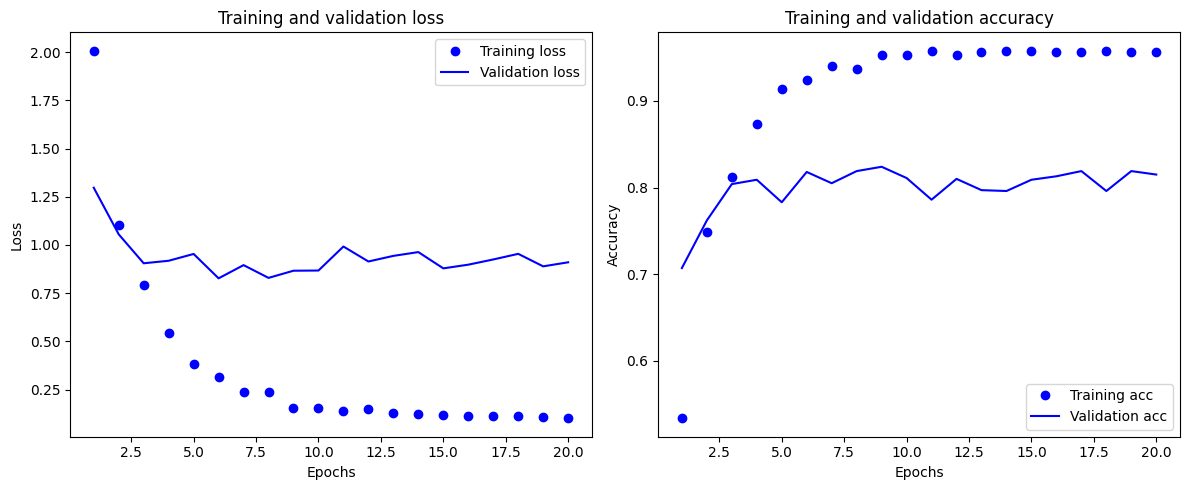

In [7]:
# --- 6. Visualizing Training History ---

# The `history` object contains the training and validation loss and accuracy for each epoch.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# --- 7. Making Predictions ---

print("\nMaking predictions on the test set...")
predictions = model.predict(x_test)

# Each prediction is an array of 46 probabilities.
# The highest probability corresponds to the predicted class.
predicted_class = np.argmax(predictions[0])
print(f"\nSample Prediction for the first test newswire:")
print(f"Predicted class index: {predicted_class}")
print(f"Actual class index: {test_labels[0]}")

# Let's see the confidence of the prediction
print(f"Confidence: {predictions[0][predicted_class]:.2%}")


Making predictions on the test set...
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Sample Prediction for the first test newswire:
Predicted class index: 3
Actual class index: 3
Confidence: 99.69%
